In [66]:
import pandas as pd
import numpy as np

In [67]:
df_emotion = pd.read_csv("../Data/emotions_kaggle.csv")
df_augmentation = pd.read_csv("../Data/emotions_augmentation.csv")

In [68]:
df_emotion.rename(columns={"Text": "text", "Emotion": "target"}, inplace=True)
df_augmentation.rename(columns={"content": "text", "sentiment": "target"}, inplace=True)
df_augmentation.drop(["tweet_id", "author"],axis=1, inplace=True)

In [69]:
df_emotion.drop_duplicates(inplace=True)
df_augmentation.drop_duplicates(inplace=True)

In [70]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## Nombre d'émotions dans chaque dataset

In [71]:
print("Emotion:", df_emotion.target.unique())
print(100*'-')
print("Augmentation:", df_augmentation.target.unique())

Emotion: ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']
----------------------------------------------------------------------------------------------------
Augmentation: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [72]:
df_emotion.groupby("target").count()["text"]

target
anger       2992
fear        2651
happy       7028
love        1641
sadness     6265
surprise     879
Name: text, dtype: int64

In [73]:
df_augmentation.groupby("target").count()["text"]

target
anger          110
boredom        179
empty          827
enthusiasm     759
fun           1776
happiness     5194
hate          1323
love          3801
neutral       8617
relief        1524
sadness       5160
surprise      2187
worry         8452
Name: text, dtype: int64

Plus d'émotions différentes dans le dataframe augmentation. Deux choix:
* ajouter uniquement les données avec les mêmes sentiments entre les deux df
* ajouter les données avec les mêmes sentiments et rajouter des sentiments supp provenant d'augmentation (neutral et worry)

## Valeurs nulles ou manquantes

In [74]:
print("NaN emotion:\n",df_emotion.isna().sum())
print("Vide emotion:\n",df_emotion[df_emotion["text"]==""].count())
print(100*'-')
print("NaN augmentation:\n",df_augmentation.isna().sum())
print("Vide augmentation:\n",df_augmentation[df_augmentation["text"]==""].count())

NaN emotion:
 text      0
target    0
dtype: int64
Vide emotion:
 text      0
target    0
dtype: int64
----------------------------------------------------------------------------------------------------
NaN augmentation:
 target    0
text      0
dtype: int64
Vide augmentation:
 target    0
text      0
dtype: int64


## Exemple de texte

In [75]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [76]:
df_emotion.head(5)

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Beaucoup de "I" dans les textes du dataframe kaggle tandis qu'il y a beaucoup d'abbréviation et de @.. dans le dataframe augmentation (tweet)  
Il faudra veiller à traiter les données différemment pour les deux dataframe

## Texthero

In [77]:
import texthero as hero

In [78]:
df_augmentation['clean_text'] = hero.clean(df_augmentation['text'])
df_emotion['clean_text'] = hero.clean(df_emotion['text'])

### Emotion

In [79]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target               
anger     feel           1803
          feeling         923
          like            479
          im              426
          really          171
          get             154
          people          150
          know            149
          time            146
          little          136
fear      feel           1483
          feeling         926
          im              383
          like            323
          little          194
          bit             143
          know            139
          really          129
          anxious         126
          still           119
happy     feel           4947
          feeling        1956
          like           1267
          im             1007
          really          381
          time            370
          know            323
          get             311
          make            276
          people          266
love      feel           1180
          feeling         471
          like    

feel, feeling, like, im et know sont des stop words dans ce jeu de données

In [80]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "ive", "one", "get"]))
df_emotion['clean_text'] = hero.remove_stopwords(df_emotion['clean_text'], custom_stopwords)

In [81]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target               
anger     really         171
          people         150
          time           146
          little         136
          want           129
          even           125
          would          118
          angry          116
          think          111
          could          108
fear      little         194
          bit            143
          really         129
          anxious        126
          time           119
          still          119
          people         106
          nervous        103
          want            95
          would           94
happy     really         381
          time           370
          make           276
          people         266
          would          265
          want           250
          good           246
          something      244
          little         240
          think          239
love      love           119
          really         112
          sweet           84
          time       

### Augmentation

On garde happiness, sadness, anger, love, surprise, worry et neutral

In [82]:
liste = ["happiness", "sadness", "anger", "love", "surprise", "worry", "neutral"]
df_augmentation = df_augmentation[df_augmentation["target"].isin(liste)]

In [83]:
df_augmentation.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target       
anger   get        8
        quot       8
        work       6
        know       6
        good       6
                ... 
worry   good     394
        got      392
        going    384
        today    378
        know     362
Name: clean_text, Length: 70, dtype: int64

In [84]:
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "http", "yeah", "twitter",
                                                "get", "got","com","u", "twitpic", "ur", "n"]))
df_augmentation['clean_text'] = hero.remove_stopwords(df_augmentation['clean_text'], custom_stopwords)

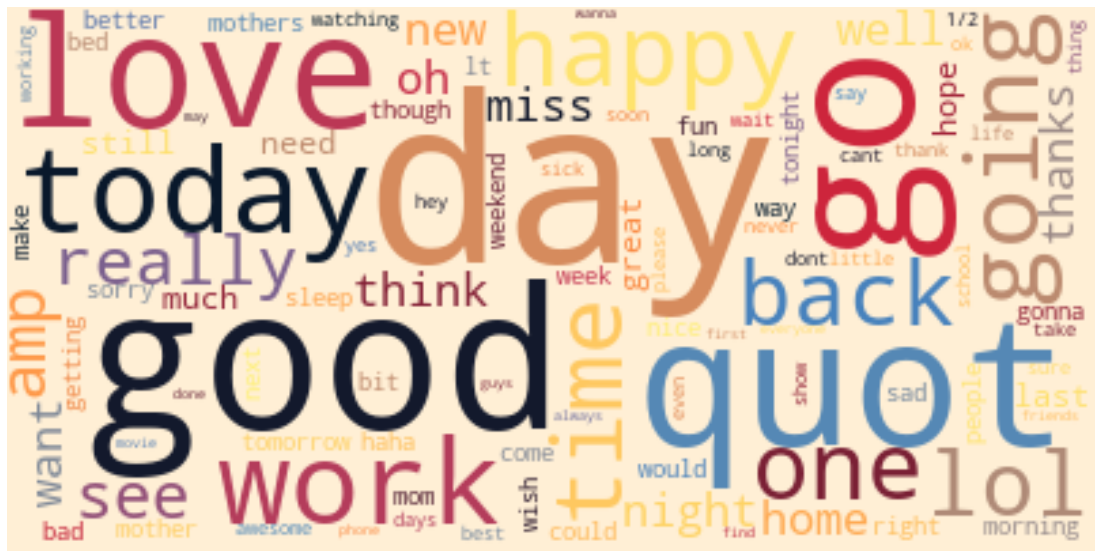

In [85]:
hero.wordcloud(df_augmentation.clean_text, max_words=100,)

In [86]:
df_augmentation.to_csv("../Data/Data_cleaned/augmentation_cleaned_rudy.csv", index=False) 
df_emotion.to_csv("../Data/Data_cleaned/emotion_cleaned_rudy.csv", index=False) 